In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import astropy.units as u
from astropy.constants import h, c, eps0, a0

#from light_old import GaussianBeam
from light import GaussianBeam

sns.set_style('whitegrid')

In [2]:
beam = GaussianBeam(
    beam_direction_vec=(1,0,0),
    pol_Jones_vec=(1,0),
    lambda_=1064,
    w0=(1000, 800),
    P=11,
    z0=0,
)

In [3]:
x = np.linspace(-1000,1000,100)
y = np.linspace(-1000,1000,100)
z = np.linspace(-1000,1000,100)

X,Y,Z = np.meshgrid(x,y,z)

E = beam.E(X,Y,Z)

ValueError: operands could not be broadcast together with shapes (1,100,100,100) (2,) 

In [ ]:
E.shape

(100, 100, 100)

In [ ]:
x = 0
y = 0
z = 0

E = beam.E(x,y,z)

In [ ]:
E.shape

()

In [ ]:
beam1 = GaussianBeam(
    lambda_=1064*u.nm,
    w0=1*u.mm,
    P=11*u.W,
    pol='linear horizontal',
    beam_direction=(0,0,1)
)

beam2 = GaussianBeam(
    lambda_=1064*u.nm,
    w0=1*u.mm,
    P=11*u.W,
    pol='linear horizontal',
    beam_direction=(0,0,-1)
)

TypeError: GaussianBeam.__init__() got an unexpected keyword argument 'pol'

In [ ]:
Re_alpha = 1*(u.Hz / (u.V/u.m)**2)
x = 0*u.mm
y = 0*u.mm
zs = np.linspace(-2,2,400)*u.um

Vs = []

for z in tqdm(zs, desc='Calculating V(0,0,z)'):
    Vs.append((Re_alpha * np.linalg.norm(beam1.E_vec(x,y,z) + beam2.E_vec(x,y,z))**2).to(u.GHz).value)

Vs = np.array(Vs)*u.GHz

Calculating V(0,0,z): 100%|██████████| 400/400 [00:02<00:00, 191.72it/s]


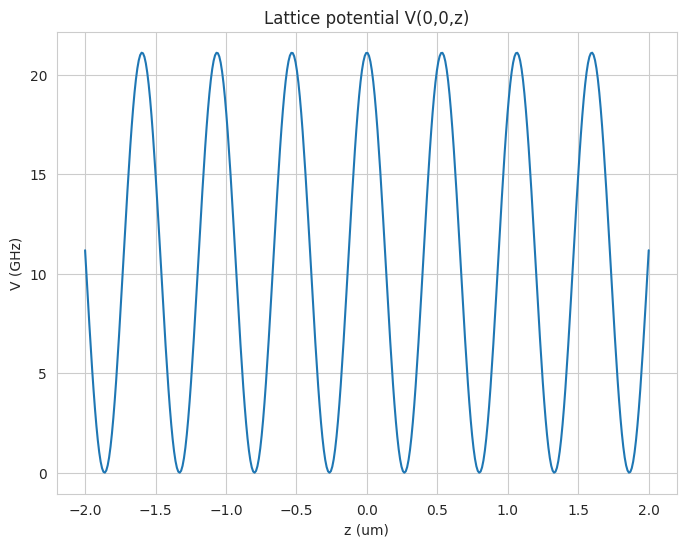

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Lattice potential V(0,0,z)')
ax.set_xlabel('z (um)')
ax.set_ylabel('V (GHz)')
ax.plot(zs.value, Vs.value)

In [ ]:
beam = GaussianBeam(
    lambda_=770*u.nm, 
    w0=1*u.mm,
    I0=2*(u.W)/(u.cm**2),
    pol='circular right',
    beam_direction=(0,0,1),
    )

In [ ]:
x = 0*u.mm 
y = 0*u.mm 
zs = np.linspace(-2,2,100)*u.m

In [ ]:
Is = []

for z in zs:
    Is.append(beam.intensity(x,y,z).value)


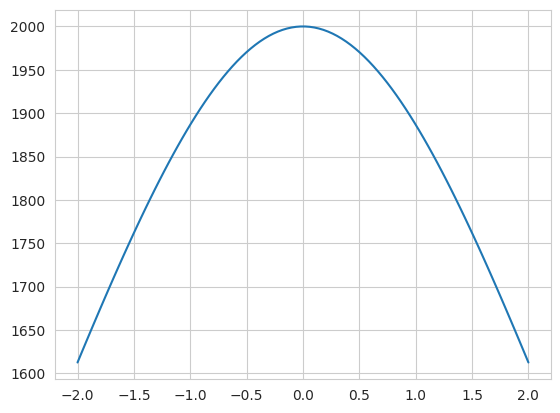

In [ ]:
plt.plot(zs.value, Is)